In [ ]:
#NAME: DEVASHISH MAYUR POTNIS
#CLASS: BE1-AIML
#ROLL NO: 43557
#PRACTICAL :5

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data Preparation
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""



In [ ]:
# Clean Data
# Remove special characters
sentences = re.sub(r'[^A-Za-z0-9\s]+', ' ', sentences)
# Remove 1 letter words
sentences = re.sub(r'\b\w{1}\b', '', sentences).strip()
# Lower all characters
sentences = sentences.lower()

# Vocabulary
words = sentences.split()
vocab = set(words)

vocab_size = len(vocab)
embed_dim = 10
context_size = 2


In [ ]:
#Implementation
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

# Data bags: data - [(context), target]
data = []
for i in range(context_size, len(words) - context_size):
    context = [words[i - context_size], words[i - context_size + 1],
               words[i + 1], words[i + context_size]]
    target = words[i]
    data.append((context, target))

print(data[:5])  # Print the first 5 context-target pairs



[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [ ]:
# Embedding
embeddings = np.random.random_sample((vocab_size, embed_dim))

# Linear model
def linear(m, theta):
    return m.dot(theta)



In [ ]:
# Log softmax + NLL loss = Cross Entropy
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum() / len(out)

def log_softmax_crossentropy_with_logits(logits, targets):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)), targets] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)
    return (-out + softmax) / logits.shape[0]



In [ ]:
# Forward function
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o



In [ ]:
# Backward function
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

# Optimize function
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

# Generate training data
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
epoch_losses = {}
for epoch in range(80):
    losses = []
    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)
        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

    epoch_losses[epoch] = losses


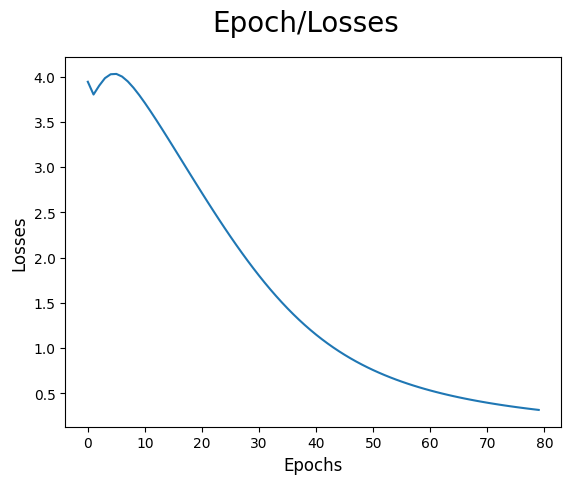

In [ ]:

# Plot loss/epoch
ix = np.arange(0, 80)
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix, [epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)
plt.show()



In [ ]:
# Predict function
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word

In [ ]:
#Test prediction
print(predict(['we', 'are', 'to', 'study']))  # Expected output: 'about'



about


In [ ]:
#Test prediction
print(predict(['we', 'are', 'to', 'study']))  # Expected output: 'about'

# Accuracy function
def accuracy():
    wrong = 0
    for context, target in data:
        if predict(context) != target:
            wrong += 1
    return 1 - (wrong / len(data))



about


In [ ]:
# Calculate accuracy
print("Accuracy:", accuracy())
print(predict(['processes', 'manipulate', 'things', 'study']))  # Example prediction

Accuracy: 1.0
as
